<a href="https://colab.research.google.com/github/wcaraker76/4GeeksProjects/blob/main/Satisfaction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import imblearn
from tensorflow import keras
import matplotlib.pyplot as plt



np.random.seed(42)

In [ ]:
#import the data 
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
#display the data to see what it looks like
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [ ]:
#statistics for the data set 
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
labels = data["TARGET"] #designate the labels

labels

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

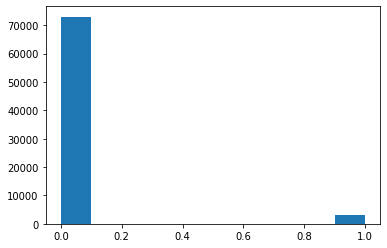

In [ ]:
#see if the data is balanced
plt.hist(labels)

In [ ]:
#remove the labels from the data 
data = data.drop("TARGET", axis=1) 
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [ ]:
#count up the number of NaNs in the data set
na = data.isna().sum()

In [ ]:
na.unique() #there is no missing data

array([0])

In [ ]:
#display the values in the columns
data.value_counts()

ID      var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  ind_var13_medio_0  ind_var13_medio  ind_var13  ind_var14_0  ind_var14  ind_var17_0  ind_var17  ind_var18_0  ind_var18  ind_var19  ind_var20_0  ind_var20  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var26  ind_var25_0  ind_var25  ind_var27_0  ind_var28_0  ind_var28  ind_var27  ind_var29_0  ind_var29  ind_var30_0  ind_var30  ind_var31_0

In [ ]:
#drop the columns that have the same data repeated throughout the columns.
cols_to_drop = data.columns[data.nunique()==1]
data.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
#Improt smote form the imblearn library to oversample the data since it is imbalanced
from imblearn.over_sampling import SMOTE

In [ ]:
#oversample the data to create a more balanced data set.

smote= SMOTE()

smote_data, smote_labels = smote.fit_resample(data, labels)

In [ ]:
#plot the difference in the amount of the labels. 
fig = plt.figure(figsize = (10,8))

plt.bar(labels)

TypeError: ignored

<Figure size 720x576 with 0 Axes>

In [ ]:
#split the data 80/20 to get it ready to go in the model
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(data, labels, stratify=labels, \
                                                              test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, \
                                                      random_state=42)

In [ ]:
#check the shape of the data
print(y_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_train_full.shape)
print(X_valid.shape)
print(X_train.shape)
print(X_test.shape)
X_train_full.shape

(15204,)
(45612,)
(15204,)
(60816,)
(15204, 336)
(45612, 336)
(15204, 336)


(60816, 336)

In [ ]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid   = scaler.transform(X_valid)

In [ ]:
keras.backend.clear_session()


In [ ]:
#create the model getting it as accurate as possible 
tf.random.set_seed(42)
model = keras.models.Sequential([
                                 
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               101100    
                                                                 
 dense_1 (Dense)             (None, 250)               75250     
                                                                 
 dense_2 (Dense)             (None, 200)               50200     
                                                                 
 dense_3 (Dense)             (None, 150)               30150     
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 256,851
Trainable params: 256,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.2), loss="binary_crossentropy", metrics=["AUC"])

Epoch 1/5
1426/1426 [==============================] - 8s 5ms/step - loss: 0.1551 - auc: 0.7061 - val_loss: 0.1615 - val_auc: 0.7500
Epoch 2/5
1426/1426 [==============================] - 7s 5ms/step - loss: 0.1500 - auc: 0.7440 - val_loss: 0.1747 - val_auc: 0.7720
Epoch 3/5
1426/1426 [==============================] - 7s 5ms/step - loss: 0.1477 - auc: 0.7599 - val_loss: 0.1527 - val_auc: 0.7799
Epoch 4/5
1426/1426 [==============================] - 6s 4ms/step - loss: 0.1455 - auc: 0.7738 - val_loss: 0.1493 - val_auc: 0.7868
Epoch 5/5
1426/1426 [==============================] - 6s 4ms/step - loss: 0.1447 - auc: 0.7785 - val_loss: 0.1600 - val_auc: 0.7879


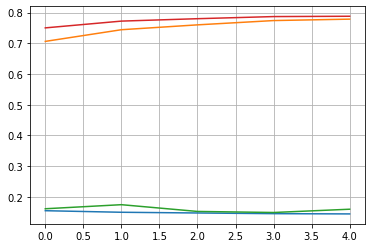

In [ ]:
sat = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
plt.plot(pd.DataFrame(sat.history))
plt.grid(True)
plt.show()

In [ ]:
#trying to get it to over fit by making it more complex
tf.random.set_seed(42)
model = keras.models.Sequential([
                                 
    keras.layers.Dense(336, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(275, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(225, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(175, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 336)               113232    
                                                                 
 dense_1 (Dense)             (None, 300)               101100    
                                                                 
 dense_2 (Dense)             (None, 275)               82775     
                                                                 
 dense_3 (Dense)             (None, 250)               69000     
                                                                 
 dense_4 (Dense)             (None, 225)               56475     
                                                                 
 dense_5 (Dense)             (None, 200)               45200     
                                                                 
 dense_6 (Dense)             (None, 175)               3

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.15), loss="binary_crossentropy", metrics=["AUC"])

Epoch 1/5
1426/1426 [==============================] - 13s 9ms/step - loss: 0.1587 - auc: 0.6823 - val_loss: 0.1615 - val_auc: 0.7210
Epoch 2/5
1426/1426 [==============================] - 12s 8ms/step - loss: 0.1536 - auc: 0.7125 - val_loss: 0.1720 - val_auc: 0.7276
Epoch 3/5
1426/1426 [==============================] - 12s 8ms/step - loss: 0.1514 - auc: 0.7331 - val_loss: 0.1556 - val_auc: 0.7696
Epoch 4/5
1426/1426 [==============================] - 11s 8ms/step - loss: 0.1498 - auc: 0.7480 - val_loss: 0.1565 - val_auc: 0.7444
Epoch 5/5
1426/1426 [==============================] - 11s 8ms/step - loss: 0.1481 - auc: 0.7587 - val_loss: 0.1637 - val_auc: 0.7768


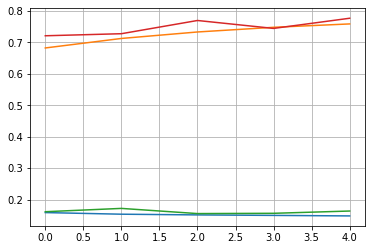

In [ ]:
sat = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
plt.plot(pd.DataFrame(sat.history))
plt.grid(True)
plt.show()

In [ ]:
keras.backend.clear_session()

In [ ]:
#Use regularization with these models

tf.random.set_seed(42)
model2 = keras.models.Sequential([
        keras.layers.Dense(9, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dropout(0.3), #drop 30% of the nuerons randomly
        keras.layers.Dense(9, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),#output layer
 ]) 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 3033      
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,133
Trainable params: 3,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["AUC"])


Epoch 1/500
46/46 [==============================] - 2s 11ms/step - loss: 0.4027 - auc: 0.5376 - val_loss: 0.2138 - val_auc: 0.6406
Epoch 2/500
46/46 [==============================] - 0s 6ms/step - loss: 0.1852 - auc: 0.5798 - val_loss: 0.1660 - val_auc: 0.6607
Epoch 3/500
46/46 [==============================] - 0s 6ms/step - loss: 0.1693 - auc: 0.6228 - val_loss: 0.1637 - val_auc: 0.6762
Epoch 4/500
46/46 [==============================] - 0s 7ms/step - loss: 0.1676 - auc: 0.6329 - val_loss: 0.1624 - val_auc: 0.6887
Epoch 5/500
46/46 [==============================] - 0s 5ms/step - loss: 0.1671 - auc: 0.6366 - val_loss: 0.1616 - val_auc: 0.6968
Epoch 6/500
46/46 [==============================] - 0s 6ms/step - loss: 0.1644 - auc: 0.6555 - val_loss: 0.1607 - val_auc: 0.7037
Epoch 7/500
46/46 [==============================] - 0s 5ms/step - loss: 0.1624 - auc: 0.6681 - val_loss: 0.1602 - val_auc: 0.7061
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 0.1631 - 

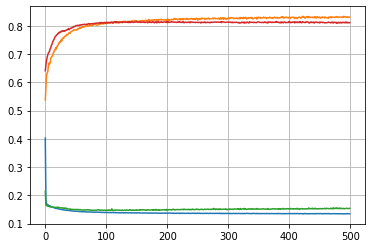

In [ ]:
show_me= model2.fit(X_train, y_train, epochs=500,\
                    batch_size= 1000, validation_data=(X_valid, y_valid))


plt.plot(pd.DataFrame(show_me.history))
plt.grid(True)
plt.show()

In [ ]:
keras.backend.clear_session()

In [ ]:
#see the difference the dropout and the optimizer has on the data
tf.random.set_seed(42)
model2 = keras.models.Sequential([
        keras.layers.Dense(9, activation="relu", input_shape=X_train.shape[1:]),
        #keras.layers.Dropout(0.3), #drop 30% of the nuerons randomly
        keras.layers.Dense(9, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),#output layer
 ]) 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 3033      
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,133
Trainable params: 3,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["AUC"])

Epoch 1/500
46/46 [==============================] - 1s 13ms/step - loss: 0.6208 - auc: 0.5895 - val_loss: 0.5940 - val_auc: 0.6318
Epoch 2/500
46/46 [==============================] - 0s 6ms/step - loss: 0.5674 - auc: 0.6344 - val_loss: 0.5398 - val_auc: 0.6496
Epoch 3/500
46/46 [==============================] - 0s 5ms/step - loss: 0.5139 - auc: 0.6511 - val_loss: 0.4889 - val_auc: 0.6611
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 0.4655 - auc: 0.6602 - val_loss: 0.4435 - val_auc: 0.6667
Epoch 5/500
46/46 [==============================] - 0s 6ms/step - loss: 0.4216 - auc: 0.6614 - val_loss: 0.4013 - val_auc: 0.6683
Epoch 6/500
46/46 [==============================] - 0s 6ms/step - loss: 0.3801 - auc: 0.6683 - val_loss: 0.3619 - val_auc: 0.6713
Epoch 7/500
46/46 [==============================] - 0s 6ms/step - loss: 0.3432 - auc: 0.6737 - val_loss: 0.3284 - val_auc: 0.6726
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 0.3120 - 

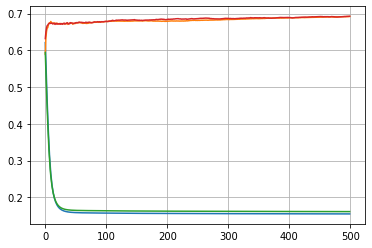

In [ ]:
show_me= model2.fit(X_train, y_train, epochs=500,\
                    batch_size= 1000, validation_data=(X_valid, y_valid))


plt.plot(pd.DataFrame(show_me.history))
plt.grid(True)
plt.show()

In [ ]:
keras.backend.clear_session()

In [ ]:
#make the model more complex to see how high we can get the accuracy to go with the new things we have learned
tf.random.set_seed(42)
model2 = keras.models.Sequential([
        keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(18, activation="relu",),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(9, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),#output layer
 ]) 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                20220     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 18)                558       
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 1

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["AUC"])

Epoch 1/500
46/46 [==============================] - 2s 15ms/step - loss: 0.3764 - auc: 0.5359 - val_loss: 0.1712 - val_auc: 0.6599
Epoch 2/500
46/46 [==============================] - 0s 9ms/step - loss: 0.2314 - auc: 0.5667 - val_loss: 0.1614 - val_auc: 0.6950
Epoch 3/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2046 - auc: 0.6007 - val_loss: 0.1604 - val_auc: 0.7202
Epoch 4/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1903 - auc: 0.6388 - val_loss: 0.1593 - val_auc: 0.7516
Epoch 5/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1851 - auc: 0.6493 - val_loss: 0.1584 - val_auc: 0.7601
Epoch 6/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1777 - auc: 0.6667 - val_loss: 0.1570 - val_auc: 0.7643
Epoch 7/500
46/46 [==============================] - 0s 11ms/step - loss: 0.1735 - auc: 0.6756 - val_loss: 0.1553 - val_auc: 0.7712
Epoch 8/500
46/46 [==============================] - 0s 10ms/step - loss: 0.168

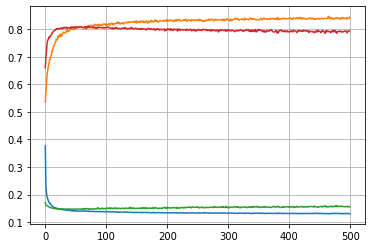

In [ ]:
show_me= model2.fit(X_train, y_train, epochs=500,\
                    batch_size= 1000, validation_data=(X_valid, y_valid))


plt.plot(pd.DataFrame(show_me.history))
plt.grid(True)
plt.show()

In [ ]:
#Use smote to deal with the imbalance. 

from sklearn.model_selection import train_test_split #split the smote data


X_train, X_valid, y_train, y_valid = train_test_split(smote_data, smote_labels, \
                                                      test_size= 0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler #scale the smote data
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid   = scaler.transform(X_valid)


In [ ]:
keras.backend.clear_session()

In [ ]:
tf.random.set_seed(42)
smote_model2 = keras.models.Sequential([
        keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(18, activation="relu",),
        keras.layers.Dropout(0.5), #drop 50% of the nuerons randomly
        keras.layers.Dense(9, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),#output layer
 ]) 
smote_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                20220     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 18)                558       
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 1

In [ ]:
smote_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["AUC"])

Epoch 1/500
117/117 [==============================] - 4s 15ms/step - loss: 0.5803 - auc: 0.7794 - val_loss: 0.4561 - val_auc: 0.8812
Epoch 2/500
117/117 [==============================] - 1s 12ms/step - loss: 0.4504 - auc: 0.8742 - val_loss: 0.3558 - val_auc: 0.9227
Epoch 3/500
117/117 [==============================] - 1s 12ms/step - loss: 0.3897 - auc: 0.9059 - val_loss: 0.3338 - val_auc: 0.9332
Epoch 4/500
117/117 [==============================] - 1s 12ms/step - loss: 0.3618 - auc: 0.9182 - val_loss: 0.3158 - val_auc: 0.9403
Epoch 5/500
117/117 [==============================] - 1s 12ms/step - loss: 0.3421 - auc: 0.9269 - val_loss: 0.2981 - val_auc: 0.9448
Epoch 6/500
117/117 [==============================] - 1s 12ms/step - loss: 0.3278 - auc: 0.9326 - val_loss: 0.2934 - val_auc: 0.9493
Epoch 7/500
117/117 [==============================] - 1s 12ms/step - loss: 0.3210 - auc: 0.9352 - val_loss: 0.2841 - val_auc: 0.9516
Epoch 8/500
117/117 [==============================] - 1s 11ms

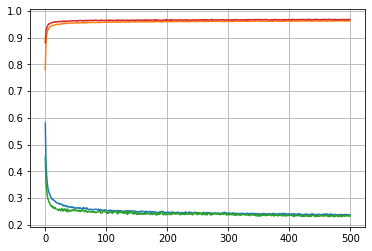

In [ ]:
smote_history= smote_model2.fit(X_train, y_train, epochs=500,\
                    batch_size= 1000, validation_data=(X_valid, y_valid))


plt.plot(pd.DataFrame(smote_history.history))
plt.grid(True)
plt.show()